In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras import optimizers
import pydot
import pickle
import time

In [3]:
NAME = "Bangla_Hand_Sign_Numbers_{}".format(int(time.time()))

pickle_in = open("X_num.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_num.pickle","rb")
y = pickle.load(pickle_in)

X = X/255

print(NAME)

Bangla_Hand_Sign_Numbers_1612856958


In [5]:
# The CNN Netowrk
model = Sequential()

model.add(Conv2D(64, (2,2), input_shape=(128, 128, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
sgd = optimizers.SGD(lr=1e-2)

tensorboard = TensorBoard(log_dir="logs\{}".format(NAME))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X, y,
          batch_size=16,
          epochs=2,
          validation_split=0.25,
          callbacks=[tensorboard])

filepath="model_num"
# checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint1]

Train on 806 samples, validate on 269 samples
Epoch 1/2
806/806 [==============================] - 30s 37ms/sample - loss: 2.2573 - acc: 0.1811 - val_loss: 2.1899 - val_acc: 0.3494
Epoch 2/2
806/806 [==============================] - 30s 38ms/sample - loss: 2.1039 - acc: 0.3052 - val_loss: 1.9655 - val_acc: 0.2974


In [15]:
model.save('model_num.h5', save_format = 'h5')

In [13]:
model.save('model_num')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 127, 127, 64)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 21, 21, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 19, 19, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [ ]:
model_json = model.to_json()
with open("model_num.json", "w") as json_file:
    json_file.write(model_json)

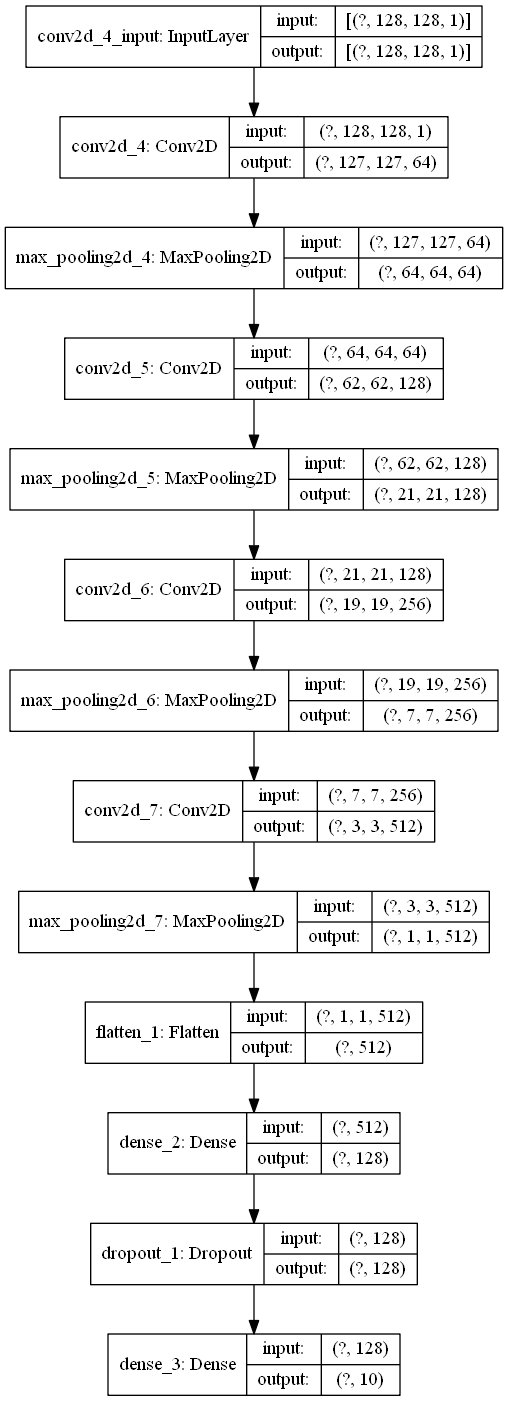

In [6]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_num.png')
Image(retina=True, filename='model_num.png')